# **PAM Clustering**

PAM Clustering full form is Partitioning Around Medoids clustering which is a unsupervised learning algorithm. A medoid can be defined as a point in the cluster, whose dissimilarities with all the other points in the cluster are minimum. The dissimilarity of the medoid(Ci) and object(Pi) is calculated by using E = |Pi – Ci|<br>
The PAM Clustering consists of following concepts:
- **Medoid:** An object in a cluster whose average dissimilarity to all the objects in the cluster is minimal.<br>
d(x
i
​
 ,x
j
​
 )=distance between points x
i
​
  and x
j
​

- **Total Dissimilarity:** The measure of difference between two objects. Common measures include Euclidean distance, Manhattan distance, and others.<br>
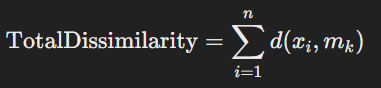
- **Cost Function:** The sum of dissimilarities between all objects and their corresponding medoids.<br>
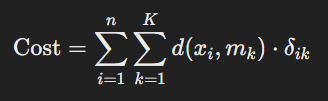
<br>
where δik is 1 if
𝑥i belongs to the cluster with medoid
𝑚𝑘
 and 0 otherwise.

In [1]:
import numpy as np

class PAM:
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.labels_ = None
        self.medoids_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        m, n = X.shape

        # Randomly initialize medoids
        medoid_indices = np.random.choice(m, self.n_clusters, replace=False)
        medoids = X[medoid_indices]

        for _ in range(self.max_iter):
            # Assign clusters based on the closest medoids
            labels = self._assign_labels(X, medoids)

            # Update medoids
            new_medoids = np.array([self._compute_medoid(X, labels == k) for k in range(self.n_clusters)])

            # Check for convergence
            if np.all(medoids == new_medoids):
                break

            medoids = new_medoids

        self.medoids_ = medoids
        self.labels_ = self._assign_labels(X, medoids)

    def _assign_labels(self, X, medoids):
        distances = np.array([[np.linalg.norm(x - medoid) for medoid in medoids] for x in X])
        return np.argmin(distances, axis=1)

    def _compute_medoid(self, X, cluster_mask):
        cluster_points = X[cluster_mask]
        if len(cluster_points) == 0:
            return X[np.random.choice(len(X))]

        pairwise_distances = np.sum(np.abs(cluster_points[:, np.newaxis] - cluster_points[np.newaxis, :]), axis=2)
        medoid_index = np.argmin(np.sum(pairwise_distances, axis=1))
        return cluster_points[medoid_index]

    def predict(self, X):
        if self.medoids_ is None:
            raise ValueError("The model has not been fitted yet.")
        return self._assign_labels(X, self.medoids_)

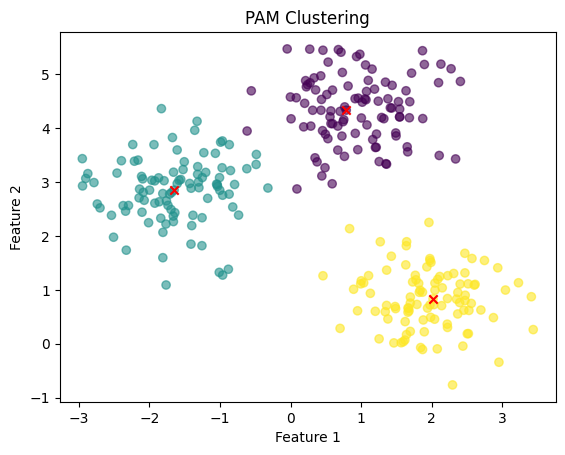

In [2]:
# testing case
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

    pam = PAM(n_clusters=3, random_state=0)
    pam.fit(X)

    plt.scatter(X[:, 0], X[:, 1], c=pam.labels_, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(pam.medoids_[:, 0], pam.medoids_[:, 1], c='red', marker='x')
    plt.title("PAM Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()